In [88]:
!pip install umap-learn


In [89]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [90]:
# Import necessary libraries
from __future__ import print_function
import time
from sklearn.manifold import TSNE
%matplotlib inline

import umap
import pandas as pd # to load the dataframe
from sklearn.preprocessing import StandardScaler # to standardize the features
from sklearn.decomposition import PCA # to apply PCA
import seaborn as sns # to plot the heat maps
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.mixture import GaussianMixture # for GMM clustering
from sklearn import metrics # for calculating Silhouette score
import optuna
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import warnings

In [91]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [92]:
#Load the Dataset
def importdata(t='dataset1.csv'):
    data = pd.read_csv(t, index_col=0)
    df=pd.DataFrame(data)
    df=df[pd.isnull(df)==False]
    return df
    

In [236]:
df=importdata('dataset2.csv')
df

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G191,G192,G193,G194,G195,G196,G197,G198,G199,G200
C1,8.764872,10.090112,8.758223,9.326429,8.280771,5.247928,10.113742,7.451211,7.876517,10.470659,...,7.033423,8.771489,8.573647,0.000000,7.219169,6.554589,9.011227,10.266787,7.357552,0.000000
C2,0.000000,9.754888,8.370687,9.815383,6.845490,5.044394,10.308339,7.044394,7.807355,9.375039,...,6.539159,7.900867,8.294621,0.000000,7.285402,4.700440,8.199672,9.375039,6.643856,8.266787
C3,8.588715,10.047124,8.800900,9.598053,8.022368,0.000000,10.306062,7.499846,8.071462,10.245553,...,6.700440,0.000000,8.285402,8.487840,0.000000,6.954196,8.982994,10.243174,7.098032,8.573647
C4,8.566054,10.030667,8.569856,9.525521,8.209453,5.044394,10.265615,7.523562,7.774787,10.352043,...,7.108524,8.675957,8.209453,8.455327,7.257388,6.741467,9.118941,10.138272,7.055282,8.748193
C5,9.169925,10.334273,8.353147,7.679480,8.933691,6.741467,8.507795,8.661778,8.668885,10.733863,...,6.714246,9.684749,8.820179,8.957102,8.339850,8.672425,9.689998,10.498849,8.754888,9.703904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C196,8.816984,9.276124,6.672425,0.000000,7.592457,0.000000,4.857981,9.914385,9.583083,8.370687,...,0.000000,10.344296,7.748193,5.832890,9.961450,8.607330,8.262095,7.357552,10.296916,10.253847
C197,8.816984,10.014020,8.599913,9.346514,8.055282,5.459432,10.215533,7.546894,8.164907,10.399812,...,7.033423,8.569856,8.280771,8.066089,7.330917,6.741467,9.335390,10.450180,0.000000,8.550747
C198,9.189825,10.259743,8.787903,7.562242,0.000000,7.276124,8.179909,8.857981,8.876517,10.504819,...,0.000000,10.063395,8.784635,8.124121,8.845490,0.000000,9.645658,10.030667,9.204571,9.984418
C199,0.000000,10.358651,8.299208,6.781360,8.741467,7.238405,6.781360,9.505812,9.214319,9.839204,...,6.882643,10.592457,0.000000,7.636625,9.548822,8.936638,9.457381,9.473706,9.847057,10.300353


In [94]:
def preprocessing(df):
    #Standardize the features
    #Create an object of StandardScaler which is present in sklearn.preprocessing
    scalar = StandardScaler()
    scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
    # by using Z-score normalization we don't have to cmake the centerise because the z- score centerise it by default
    # Calculate the mean values of each feature
    # mean_values = np.mean(scaled_data, axis=0)
#   Centerize the dataset by subtracting the mean values
    # centered_dataset = scaled_data - mean_values
    return scaled_data
    


In [95]:
centered_dataset=preprocessing(df)
centered_dataset

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.541057,0.680598,0.371758,0.709034,0.556078,0.736940,0.888972,0.580328,0.737548,0.421956,...,-2.201665,0.487531,0.442341,-2.220597,0.591168,0.337565,0.656743,0.477762,0.592014,0.543798
1,-0.319744,0.353967,-0.751066,0.230675,-0.225540,-0.392797,0.901288,0.172564,-1.887136,-0.752200,...,-0.527027,-0.356887,0.587767,0.866383,-0.103763,-1.579083,0.530845,-1.912313,-3.018030,-2.828919
2,0.097135,0.671380,-0.176778,0.464152,0.205637,-1.859117,0.981273,0.538812,0.935795,-0.162188,...,0.019787,-0.033791,0.655674,0.824034,0.260820,-1.579083,0.726492,-0.216448,0.138379,0.136062
3,0.661102,0.291321,0.824213,0.315781,0.598409,0.851761,0.063750,0.144098,-1.887136,0.784206,...,0.795481,0.699883,-3.054977,-0.257830,0.507888,-1.579083,0.081062,0.858587,0.613404,0.663917
4,0.017044,0.577699,-0.091405,0.480791,-2.629545,-1.859117,0.943892,0.487793,0.837553,-2.428587,...,-2.201665,0.012882,0.733706,-2.220597,0.260820,0.940174,0.551224,-0.252594,0.192799,0.147170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.572809,-0.046555,0.679584,0.043474,0.441826,-1.859117,-0.507100,-3.816431,-0.454929,0.777315,...,0.774896,-2.727468,-0.550257,-0.743968,0.324919,-0.987135,-0.278189,0.809430,0.407589,0.532151
196,0.668178,-2.189851,0.821259,0.319805,0.617102,0.881283,-0.072651,0.116946,0.033422,0.804251,...,0.876761,0.735189,-0.154626,-0.404401,0.492759,-0.814002,0.025563,0.961520,0.602345,0.710281
197,-2.726417,-2.189851,-0.215822,0.442208,0.111559,0.046461,0.930747,0.469077,0.806107,-0.211909,...,-2.201665,0.022186,-3.054977,0.904193,0.258907,1.042648,0.700406,-0.271864,0.101213,0.042970
198,-0.912556,0.037427,-1.075635,-0.270936,-0.672874,-1.052728,-1.685290,-3.816431,0.544830,-1.644057,...,-0.995335,-0.888180,0.535853,0.816296,-0.837178,-1.579083,-0.062153,-1.611833,-0.842963,-1.096434


In [237]:
df.index

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       ...
       'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198', 'C199',
       'C200'],
      dtype='object', length=200)

In [238]:
#visualize the data in 2D space
def visualizedata(scaled_data, df_original):
    pca = PCA(n_components=2)# Fit
    #pca_2d = pca.fit_transform(centered_dataset)
    pca_2d = pca.fit_transform(scaled_data)
    df_2d = pd.DataFrame(pca_2d, columns=['PC1', 'PC2'])
    # Plot 2D PCA
    plt.figure(figsize=(10,6))
    labels = list(df_original.index)
    fig=px.scatter(x= df_2d.PC1, y = df_2d.PC2,color=labels)
    fig.update_layout(
    title="'Principal Components 2D'",
    xaxis_title="PC1",
    yaxis_title="PC2",
     )
    fig.show()
     
      

C:\Users\batou\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



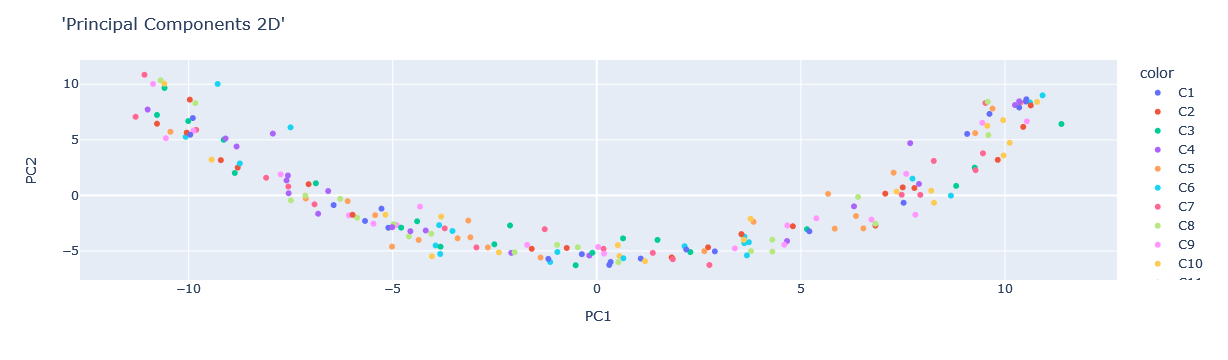

<Figure size 1000x600 with 0 Axes>

In [239]:
 visualizedata(centered_dataset, df)

In [240]:
def apply_pca(dataset, n_components):
    pca = PCA(n_components=n_components,random_state=42)
    #pca = PCA(n_components=0.85)
    reduced_data = pca.fit_transform(dataset)
    print(reduced_data)

    # Calculate the explained variance ratio
    explained_variance_ratio = pca.explained_variance_
    
    # Plot the explained variance ratio
    plt.figure(figsize=(50,20))
    plt.bar(x= [str(i) for i in range(1,pca.n_components_+1)], height= pca.explained_variance_ratio_)
    #plt.bar(range(1,pca.n_components + 1), explained_variance_ratio)
    plt.xlabel('Principal Components', size=40)
    plt.ylabel('Explained Variance Ratio', size=40)
    plt.title('Explained Variance Ratio for Principal Components', size=40)
    plt.show()

    return reduced_data,pca,pca.n_components_

[[-0.36616075 -5.28716496 -2.04049743 ...  0.48231291  0.98977708
  -0.58006236]
 [ 7.49492583  0.72311336 -0.71025874 ... -0.23963436  0.61633274
  -1.12894018]
 [ 5.1490289  -3.04260359 -1.23973062 ...  0.98681111 -0.02444818
   0.05907297]
 ...
 [ 6.82606151 -2.54749134 -0.04359946 ...  1.01301019  0.29721576
   0.58664354]
 [ 9.44315624  6.5387582   2.89055431 ... -1.136212    0.87267038
  -0.08439335]
 [ 9.96540365  3.59713609  1.42647488 ... -0.50407112  0.33479667
   0.37297259]]


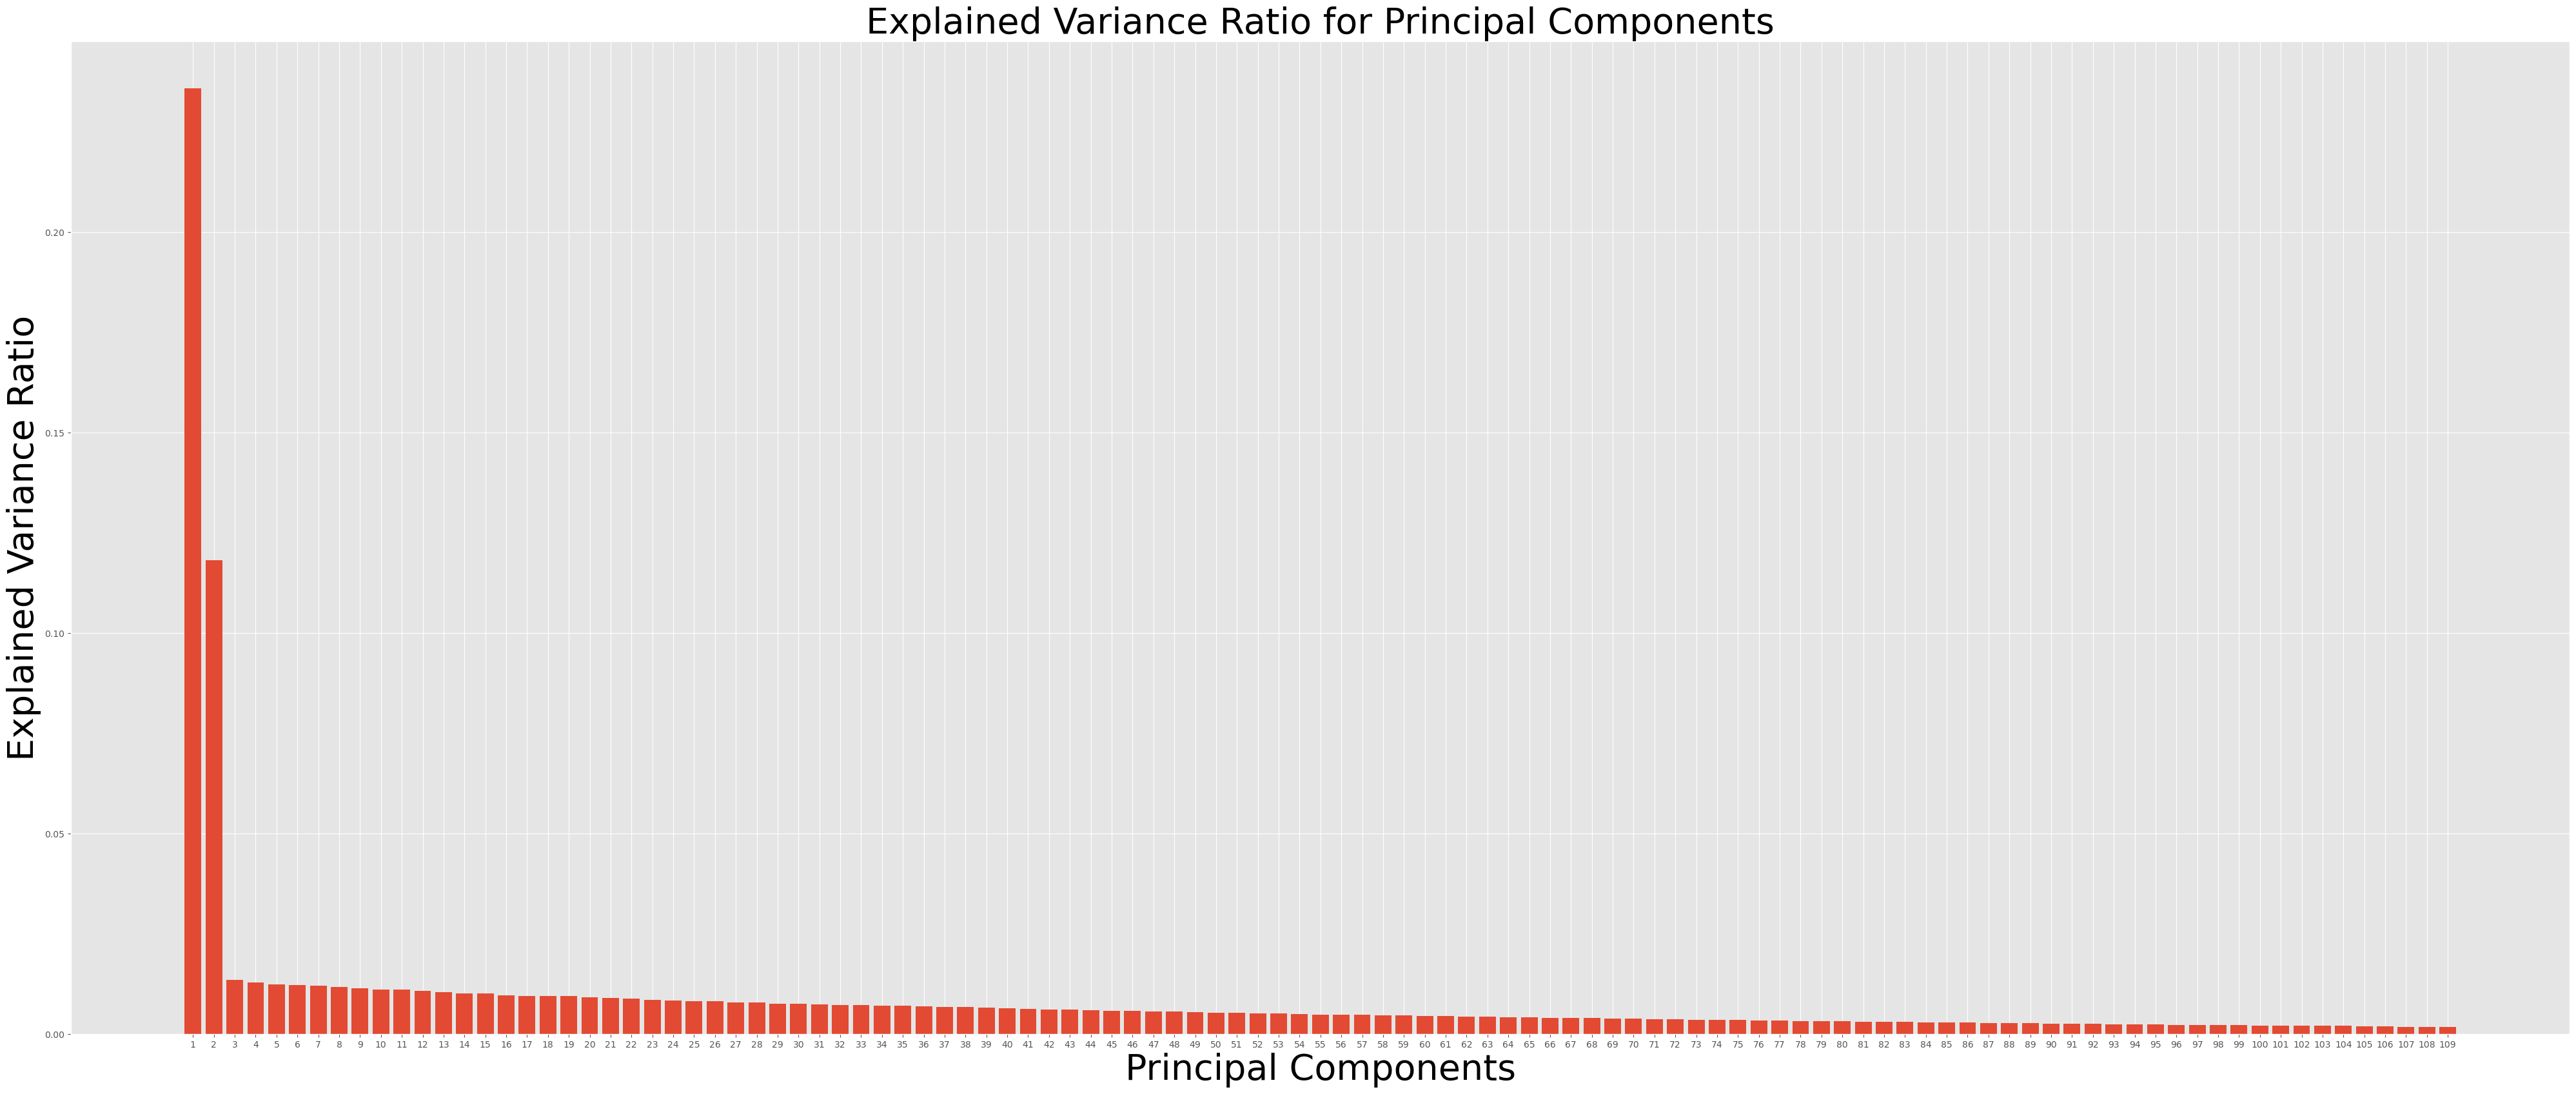

the number of new dimenions  109


In [241]:
pca_data,pca,d=apply_pca(centered_dataset,0.95)
print("the number of new dimenions ", d)

[[-3.66160745e-01 -5.28716496e+00 -2.04049743e+00 ... -5.76505849e-03
  -4.33916141e-03  1.01217161e-15]
 [ 7.49492583e+00  7.23113361e-01 -7.10258741e-01 ... -5.31797658e-03
   5.44778288e-03  1.01217161e-15]
 [ 5.14902890e+00 -3.04260359e+00 -1.23973062e+00 ... -4.21455902e-03
   4.83289743e-03  1.01217161e-15]
 ...
 [ 6.82606151e+00 -2.54749134e+00 -4.35994551e-02 ...  7.39321459e-03
   4.79243593e-03  1.01217161e-15]
 [ 9.44315624e+00  6.53875820e+00  2.89055431e+00 ...  1.47238532e-02
  -3.15803254e-03  1.01217161e-15]
 [ 9.96540365e+00  3.59713609e+00  1.42647488e+00 ...  5.62291221e-03
   1.10599770e-02  1.01217161e-15]]


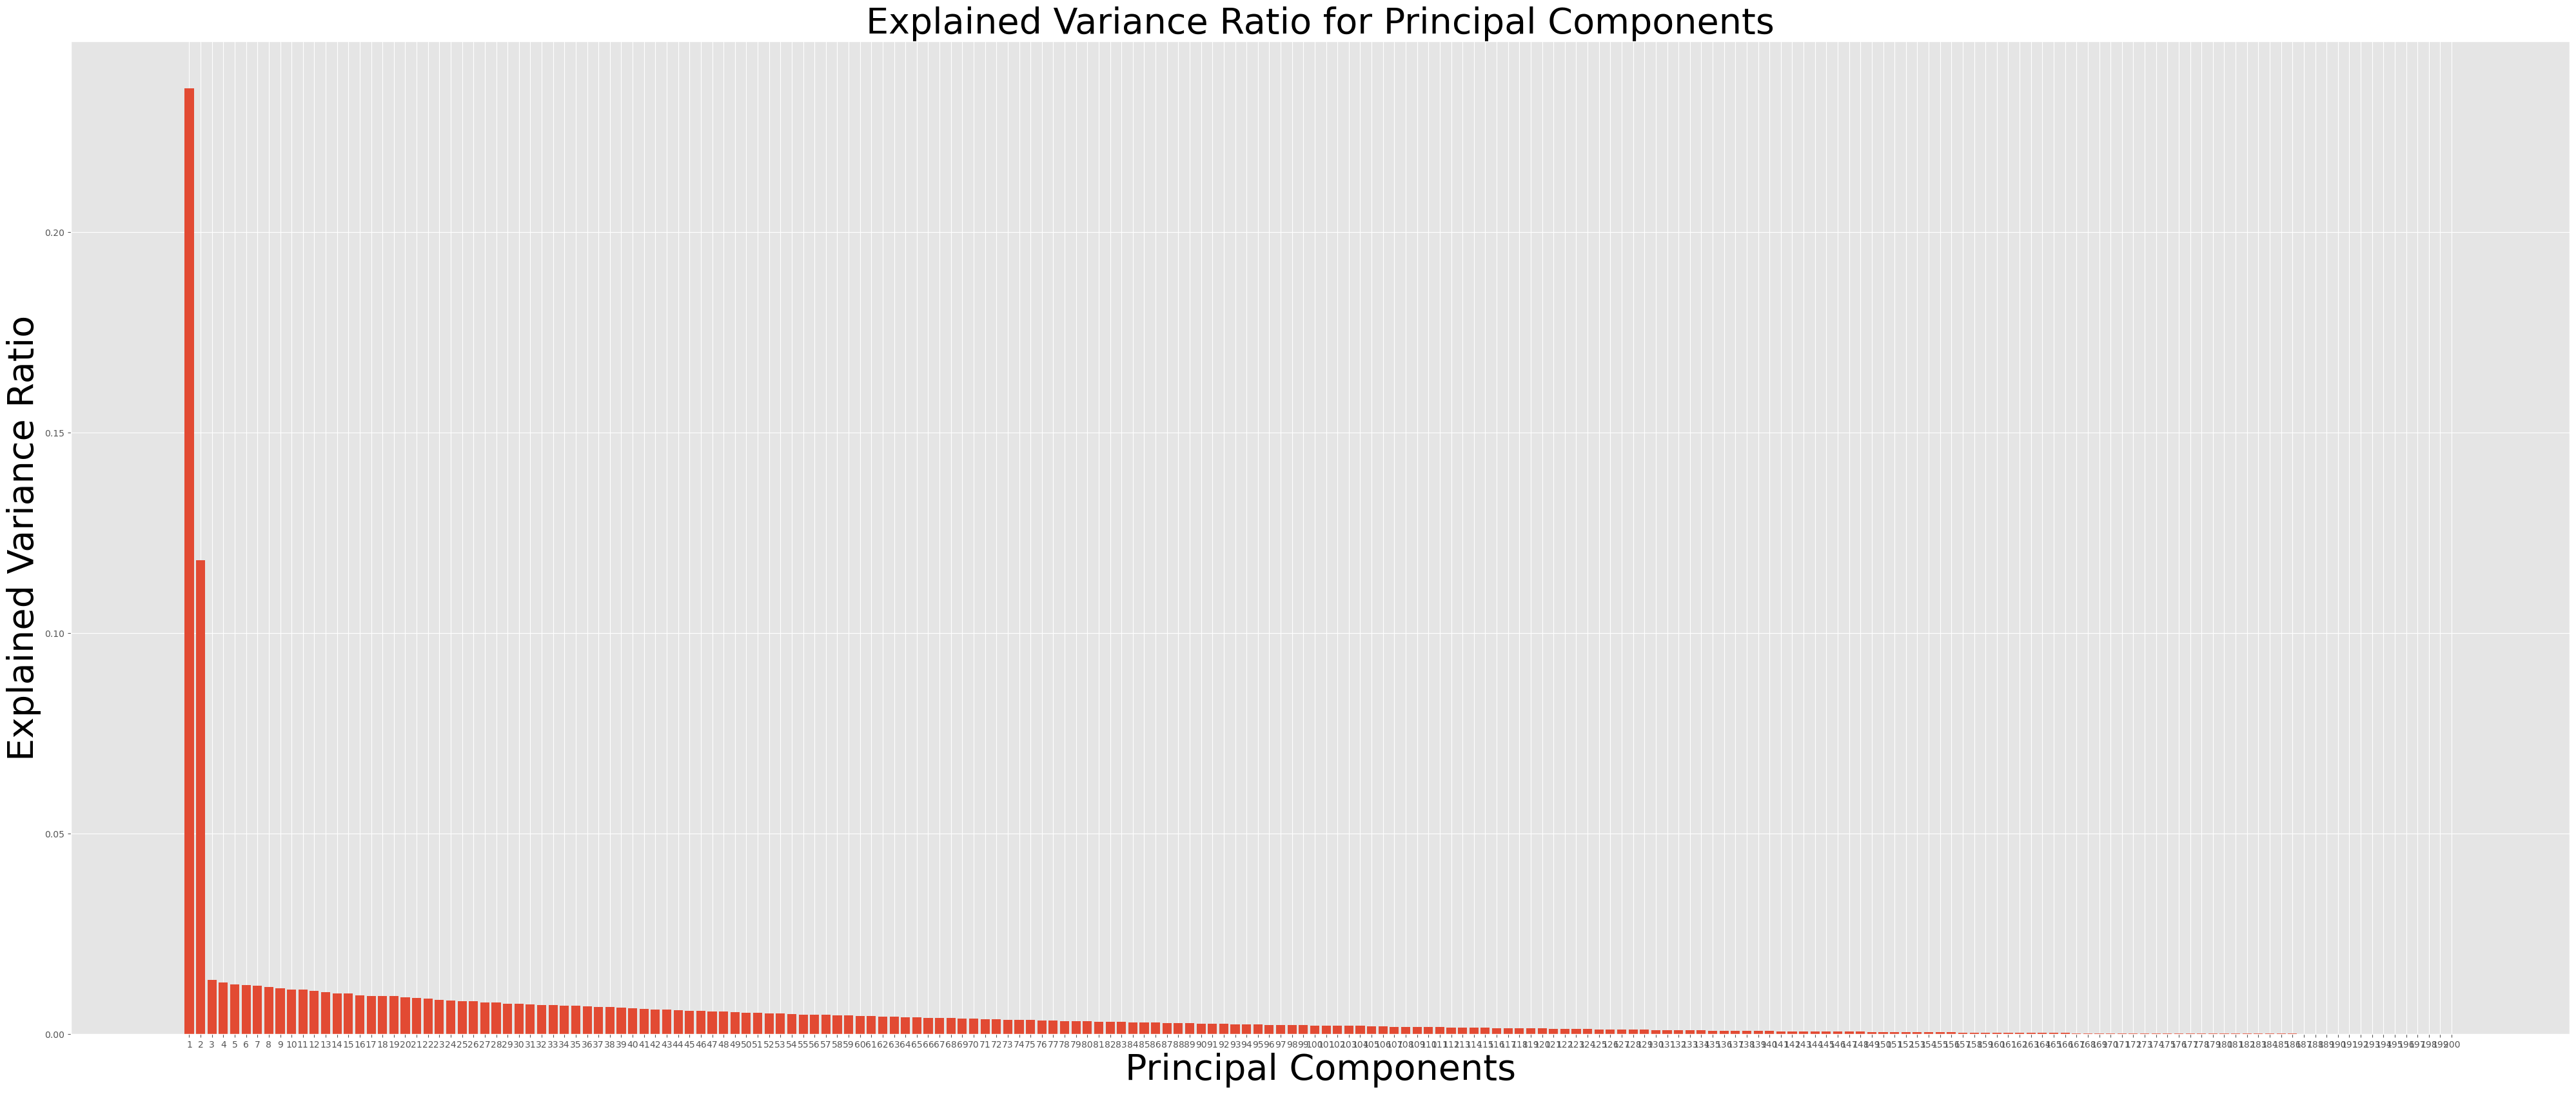

In [242]:
pca_original=apply_pca(centered_dataset,None)

In [243]:

def hotmap(pca_data):
    data_pca = pd.DataFrame(pca_data)
    #Checking Co-relation between features after PCA
    sns.heatmap(data_pca.corr())
    plt.title('Heatmap variance')
    plt.xlabel('PCs')
    plt.ylabel('PCs')


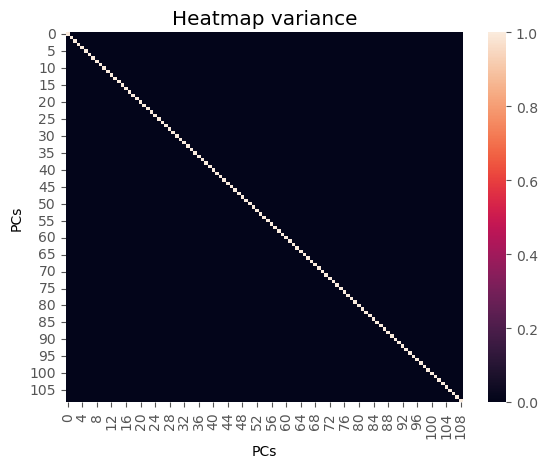

In [244]:
hotmap(pca_data)

In [245]:
print("Original number of features:", df.shape[1])
print("Reduced number of features:", pca_data.shape[1])

Original number of features: 200
Reduced number of features: 109


In [105]:
#Method 2: Plot the explained variance percentage of individual components
#and the percentage of total variance captured by all principal components.


In [246]:
#kasier rule
def kasierrule(pca):
    c = pca.explained_variance_
    c = c[c >= 1]
    reduced_dimen=len(c)
    final_pca=apply_pca(centered_dataset,reduced_dimen)
    return final_pca,reduced_dimen
    

[[-0.36616075 -5.28716496 -2.04049743 ... -3.14564265 -0.98771907
   0.23162057]
 [ 7.49492583  0.72311336 -0.71025874 ... -0.03197879 -0.85211638
  -0.23439605]
 [ 5.1490289  -3.04260359 -1.23973062 ... -0.84273204 -1.76227464
   0.09302372]
 ...
 [ 6.82606151 -2.54749134 -0.04359946 ... -0.65354131  0.62777827
  -0.99110499]
 [ 9.44315624  6.5387582   2.89055431 ... -0.46214143 -0.19659036
  -0.72059838]
 [ 9.96540365  3.59713609  1.42647488 ... -0.35082899 -0.99317512
  -0.68165627]]


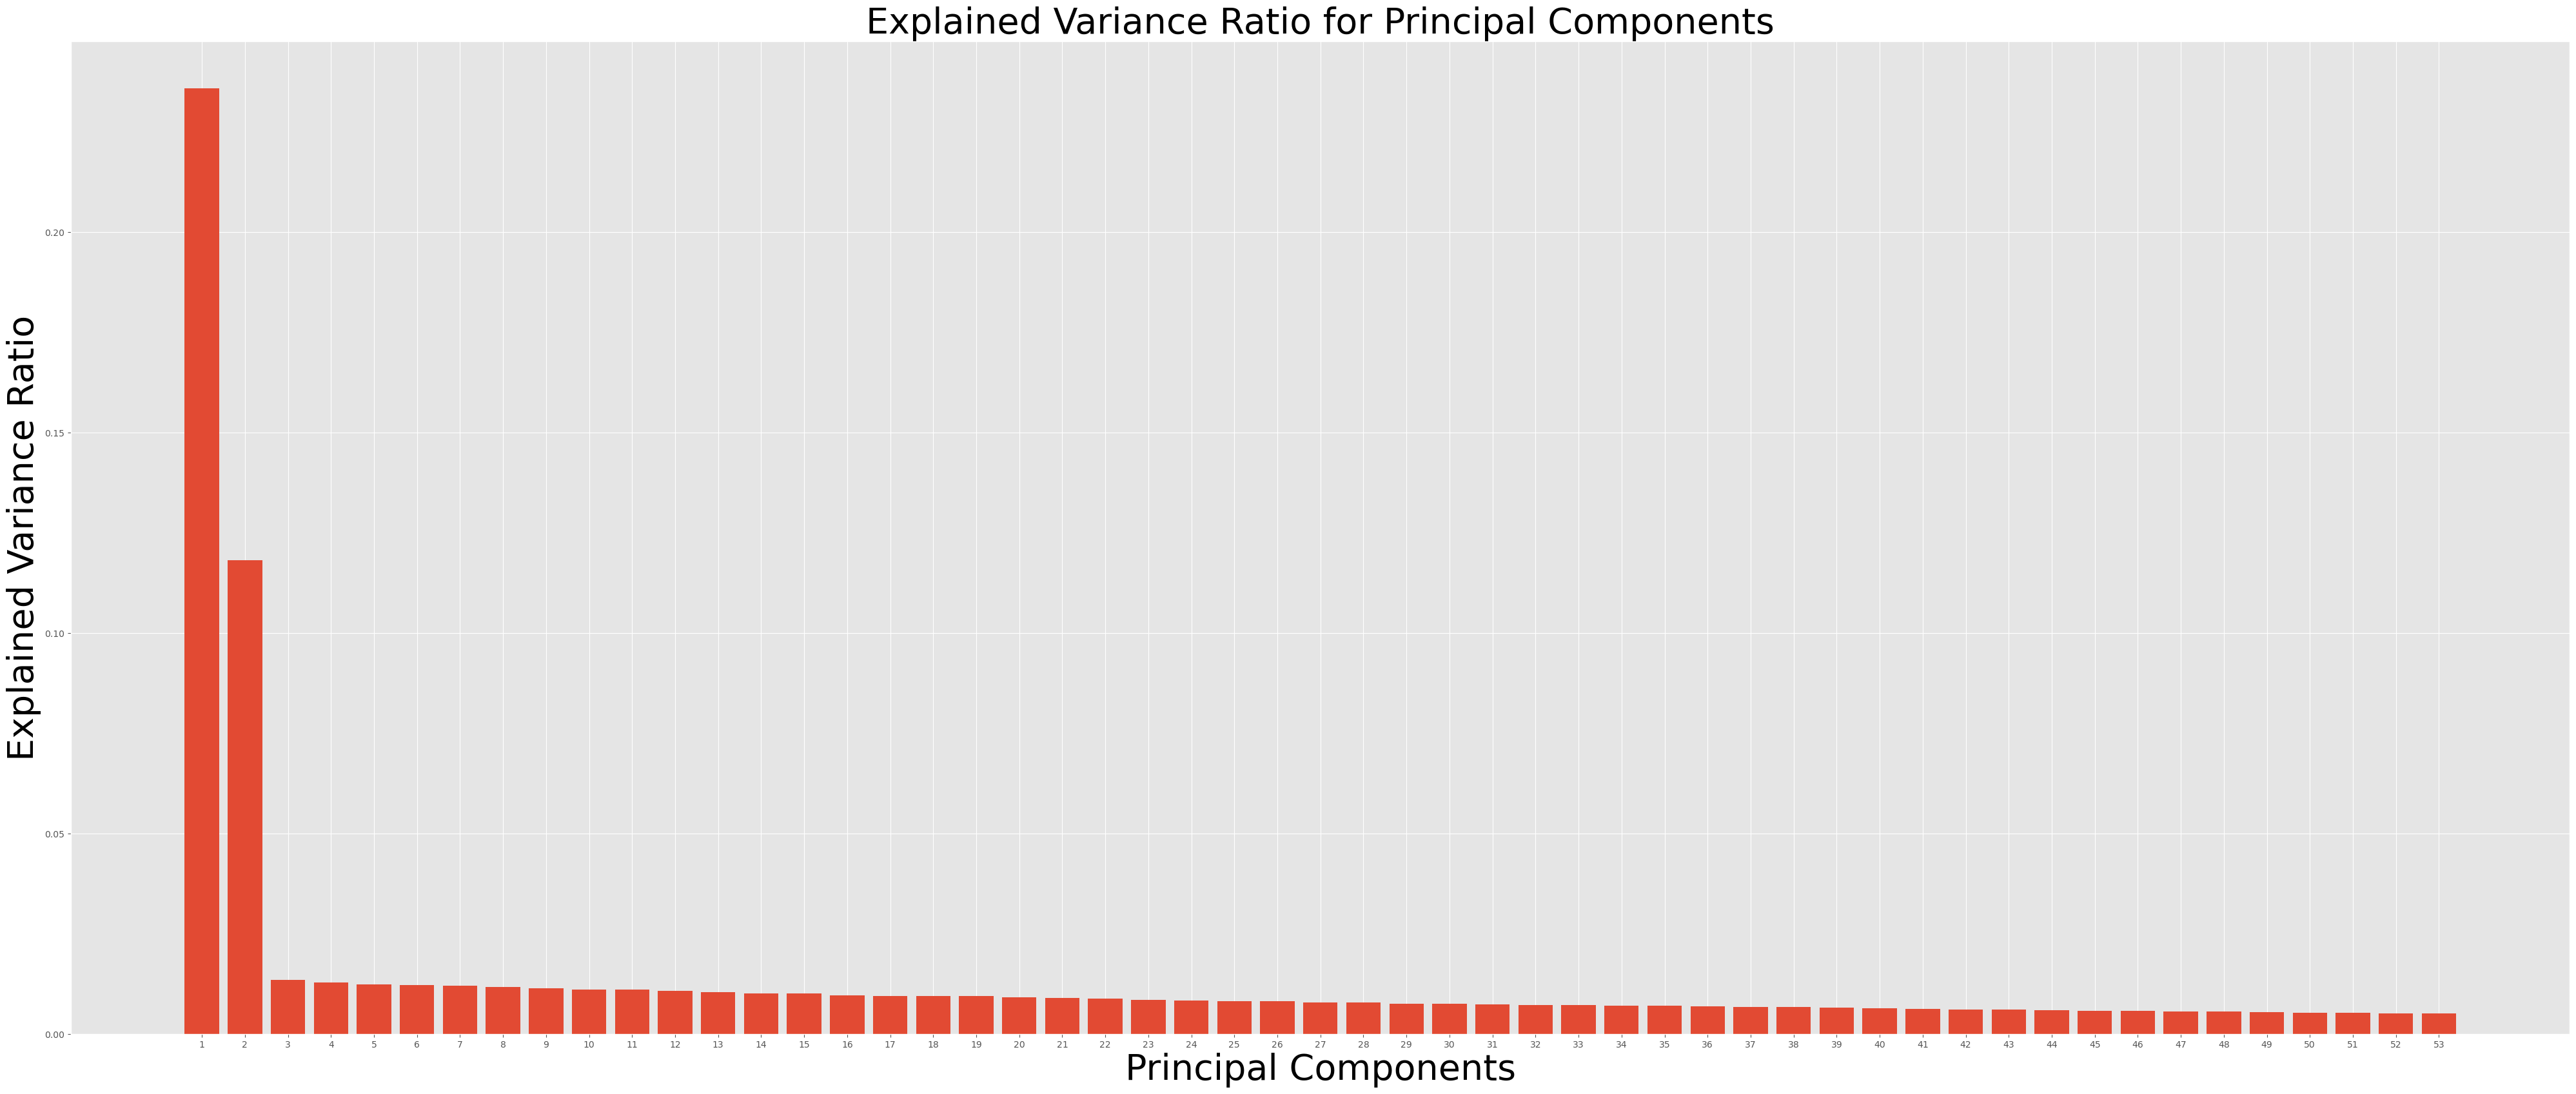

In [247]:
final_pca,reduced_dimen=kasierrule(pca)

In [248]:
def kasier_visualization_plot(centered_dataset):
        plt.figure(figsize=(10,10))
        pca = PCA(n_components=None)
        reduced_data = pca.fit_transform(centered_dataset)

        plt.style.use("ggplot")
        plt.plot(pca.explained_variance_, marker='o')
        plt.axvline(x = reduced_dimen, color='black', label='eigenvalue=1')
        plt.axhline(y = 1, color='black', label='eigenvalue=1')
        plt.xlabel("Eigenvalue number")
        plt.ylabel("Eigenvalue size")
        #plt.legend(loc='center right')
        plt.title("Scree Plot")

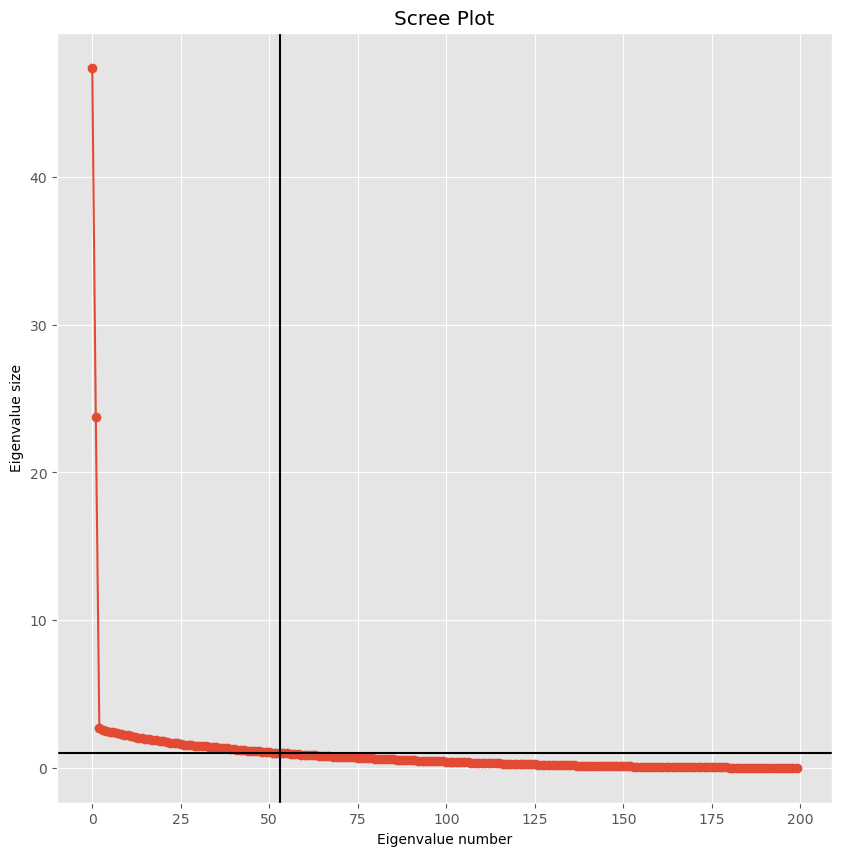

In [249]:
kasier_visualization_plot(centered_dataset)

In [250]:

def tsne_perplexity_curve(centered_dataset):
        perplexity = np.arange(10, 70, 5)
        divergence = []

        for i in perplexity:
            model = TSNE(n_components=2, perplexity=i)
            reduced = model.fit_transform(centered_dataset)
            divergence.append(model.kl_divergence_)
        fig = px.line(x=perplexity, y=divergence, markers=True)
        fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
        fig.update_traces(line_color="red", line_width=1)
        fig.show()

C:\Users\batou\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



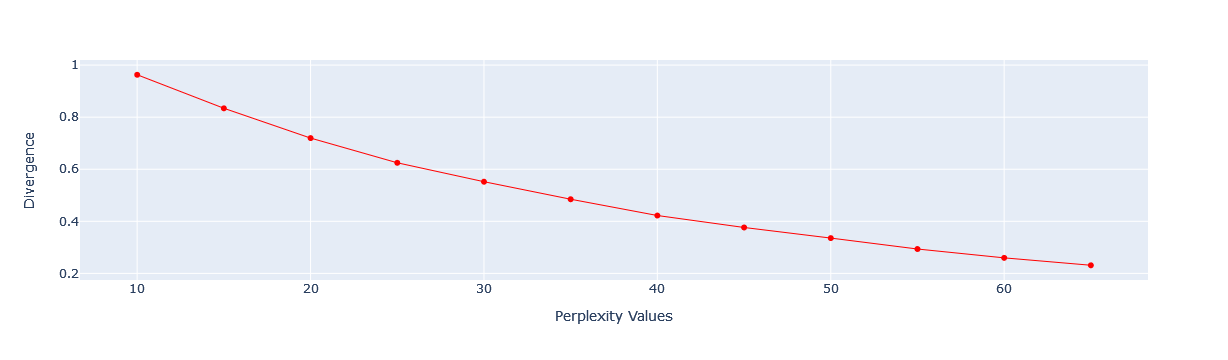

In [251]:
tsne_perplexity_curve(centered_dataset)


In [252]:
def applying_tse_for_dif_matrices(centered_dataset,perplexity):
        tsne_results = []
        for metric in ['manhattan', 'euclidean','cosine','correlation','mahalanobis','minkowski']:
            #tsne_result = tsne(data, dimensions=n_components, perplexity=perplexity, theta=0.5, eta=learning_rate, num_iter=n_iter, verbose=2)
            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, verbose=2 , metric=metric,init='pca')
            X_tsne = tsne.fit_transform(centered_dataset)
            tsne_results.append({'name':metric, 'x': X_tsne, 'kl_div': tsne.kl_divergence_})
        return  tsne_results
           

In [253]:
 tsne_results=applying_tse_for_dif_matrices(centered_dataset,50)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 65.412955
[t-SNE] Computed conditional probabilities in 0.016s
[t-SNE] Iteration 50: error = 43.7837029, gradient norm = 0.2019724 (50 iterations in 0.050s)
[t-SNE] Iteration 100: error = 43.9576340, gradient norm = 0.1774375 (50 iterations in 0.040s)
[t-SNE] Iteration 150: error = 45.2216301, gradient norm = 0.2065878 (50 iterations in 0.036s)
[t-SNE] Iteration 200: error = 45.9270477, gradient norm = 0.2074109 (50 iterations in 0.016s)
[t-SNE] Iteration 250: error = 45.9583244, gradient norm = 0.2809390 (50 iterations in 0.047s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.958324
[t-SNE] Iteration 300: error = 0.1532654, gradient norm = 0.0122456 (50 iterations in 0.031s)
[t-SNE] Iteration 350: error = 0.1378892, gradient norm = 0.0003415

In [254]:
def tse_visual_matrices(tsne_results):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30,30))
    i=1
    for res in tsne_results:
        # Get the current subplot axes
        x = res['x']
        name=res['name']
        num=str(23)+str(i)
        plt.subplot(int(num))
        plt.scatter(x=x[:, 0], y=x[:, 1])
        plt.title(f"t-SNE visualization of Custom Classification dataset with distance matrix {name} ")
        plt.xlabel("First t-SNE")
        plt.ylabel("Second t-SNE")
        # Adjust spacing between subplots
        plt.tight_layout()
        i=i+1
        # Display the figure
    plt.show()

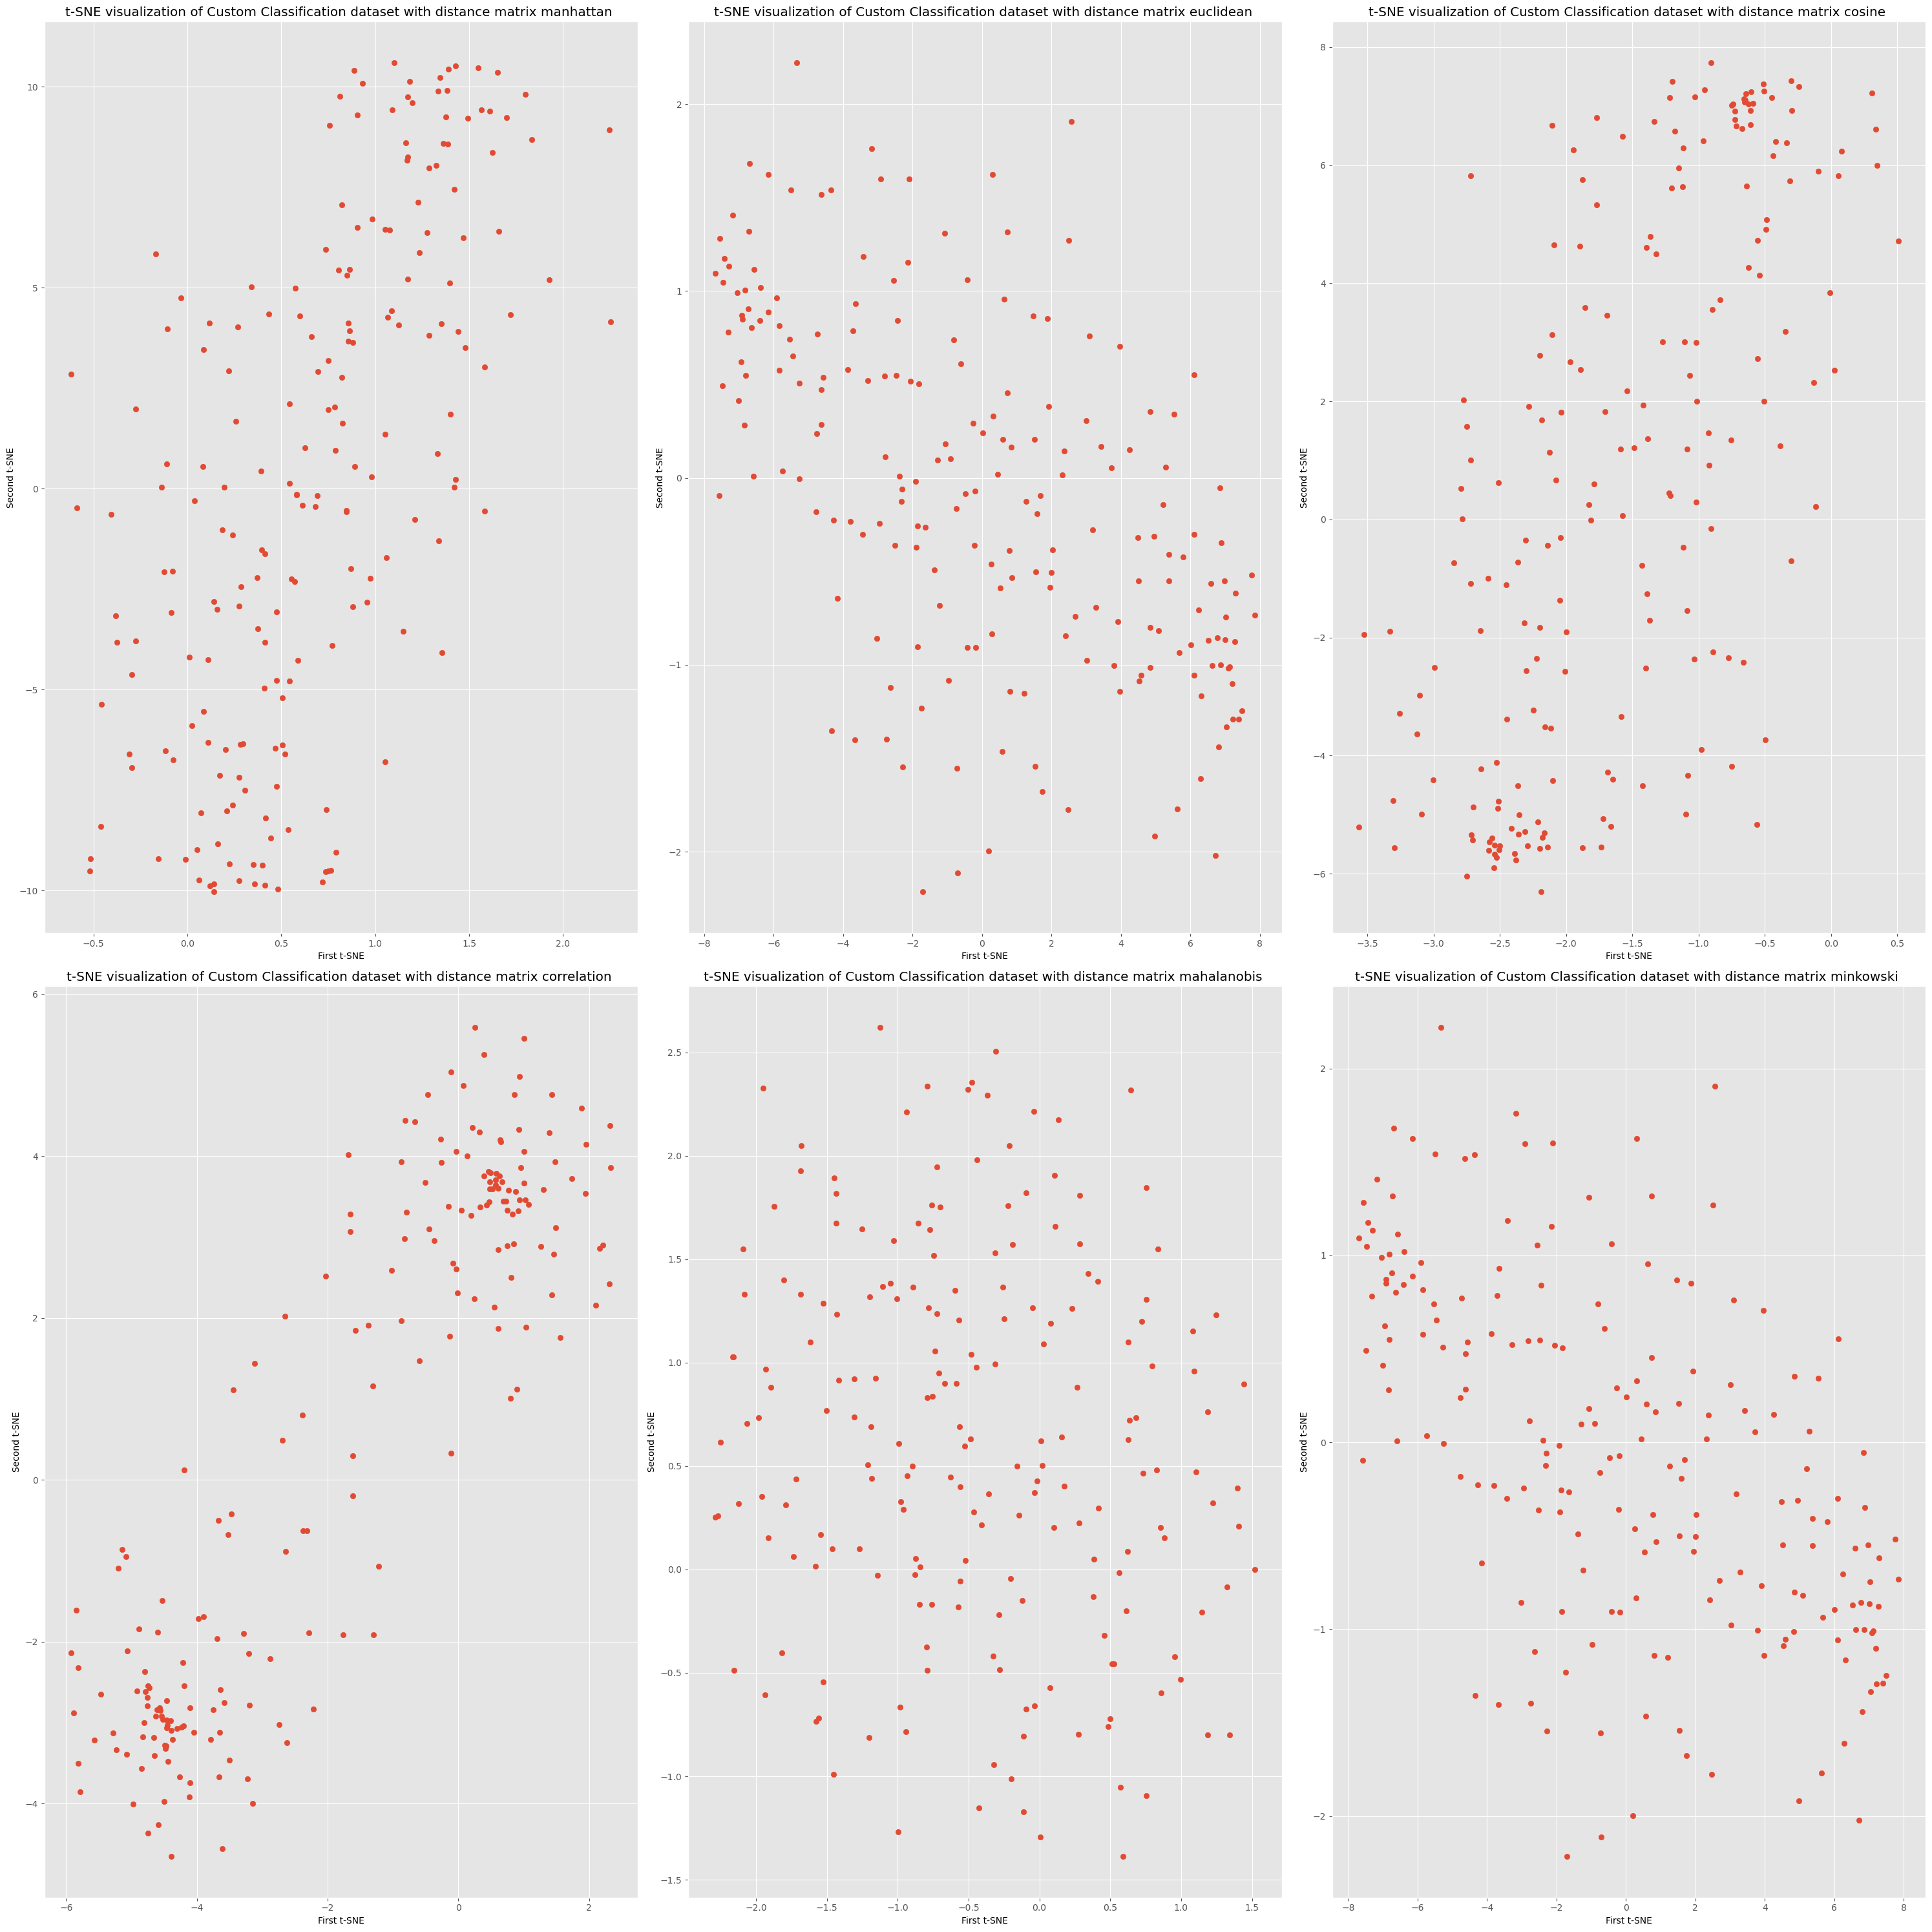

In [255]:
tse_visual_matrices(tsne_results)

In [199]:
tsne=applying_tnse_(centered_dataset,2,50,'correlation')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.318186
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 50.0979538, gradient norm = 0.3079674 (50 iterations in 0.037s)
[t-SNE] Iteration 100: error = 51.4209328, gradient norm = 0.2992096 (50 iterations in 0.031s)
[t-SNE] Iteration 150: error = 50.2484512, gradient norm = 0.3893195 (50 iterations in 0.032s)
[t-SNE] Iteration 200: error = 52.1236916, gradient norm = 0.3215082 (50 iterations in 0.033s)
[t-SNE] Iteration 250: error = 51.8564796, gradient norm = 0.2113192 (50 iterations in 0.038s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.856480
[t-SNE] Iteration 300: error = 0.4631768, gradient norm = 0.0178671 (50 iterations in 0.033s)
[t-SNE] Iteration 350: error = 0.4261855, gradient norm = 0.0015085 

In [256]:
def applying_UMAP_for_dif_matrices(centered_dataset,n_neighbors,min_dist):
        umap_results = []
        for metric in ['manhattan', 'euclidean','cosine','correlation','mahalanobis','minkowski']:
            
            umap_obj = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=42)
            umap_result = umap_obj.fit_transform(centered_dataset)
            umap_results.append({'name':metric, 'x': umap_result })
        return  umap_results
           

In [258]:
import umap
umap_results=applying_UMAP_for_dif_matrices(centered_dataset,13,0.5)

In [259]:
def umap_visual_matrices(umap_results):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30,20))
    i=1
    for res in umap_results:
        # Get the current subplot axes
        x = res['x']
        name=res['name']
        num=str(23)+str(i)
        plt.subplot(int(num))
        plt.scatter(x[:, 0], x[:, 1])
        plt.title((f"UMAP visualization of Custom Classification dataset with distance matrix {name} "))
        plt.xlabel("UMAP Dimension 1")
        plt.ylabel("UMAP Dimension 2")
        # Adjust spacing between subplots
        plt.tight_layout()
        i=i+1
        # Display the figure
    plt.show()




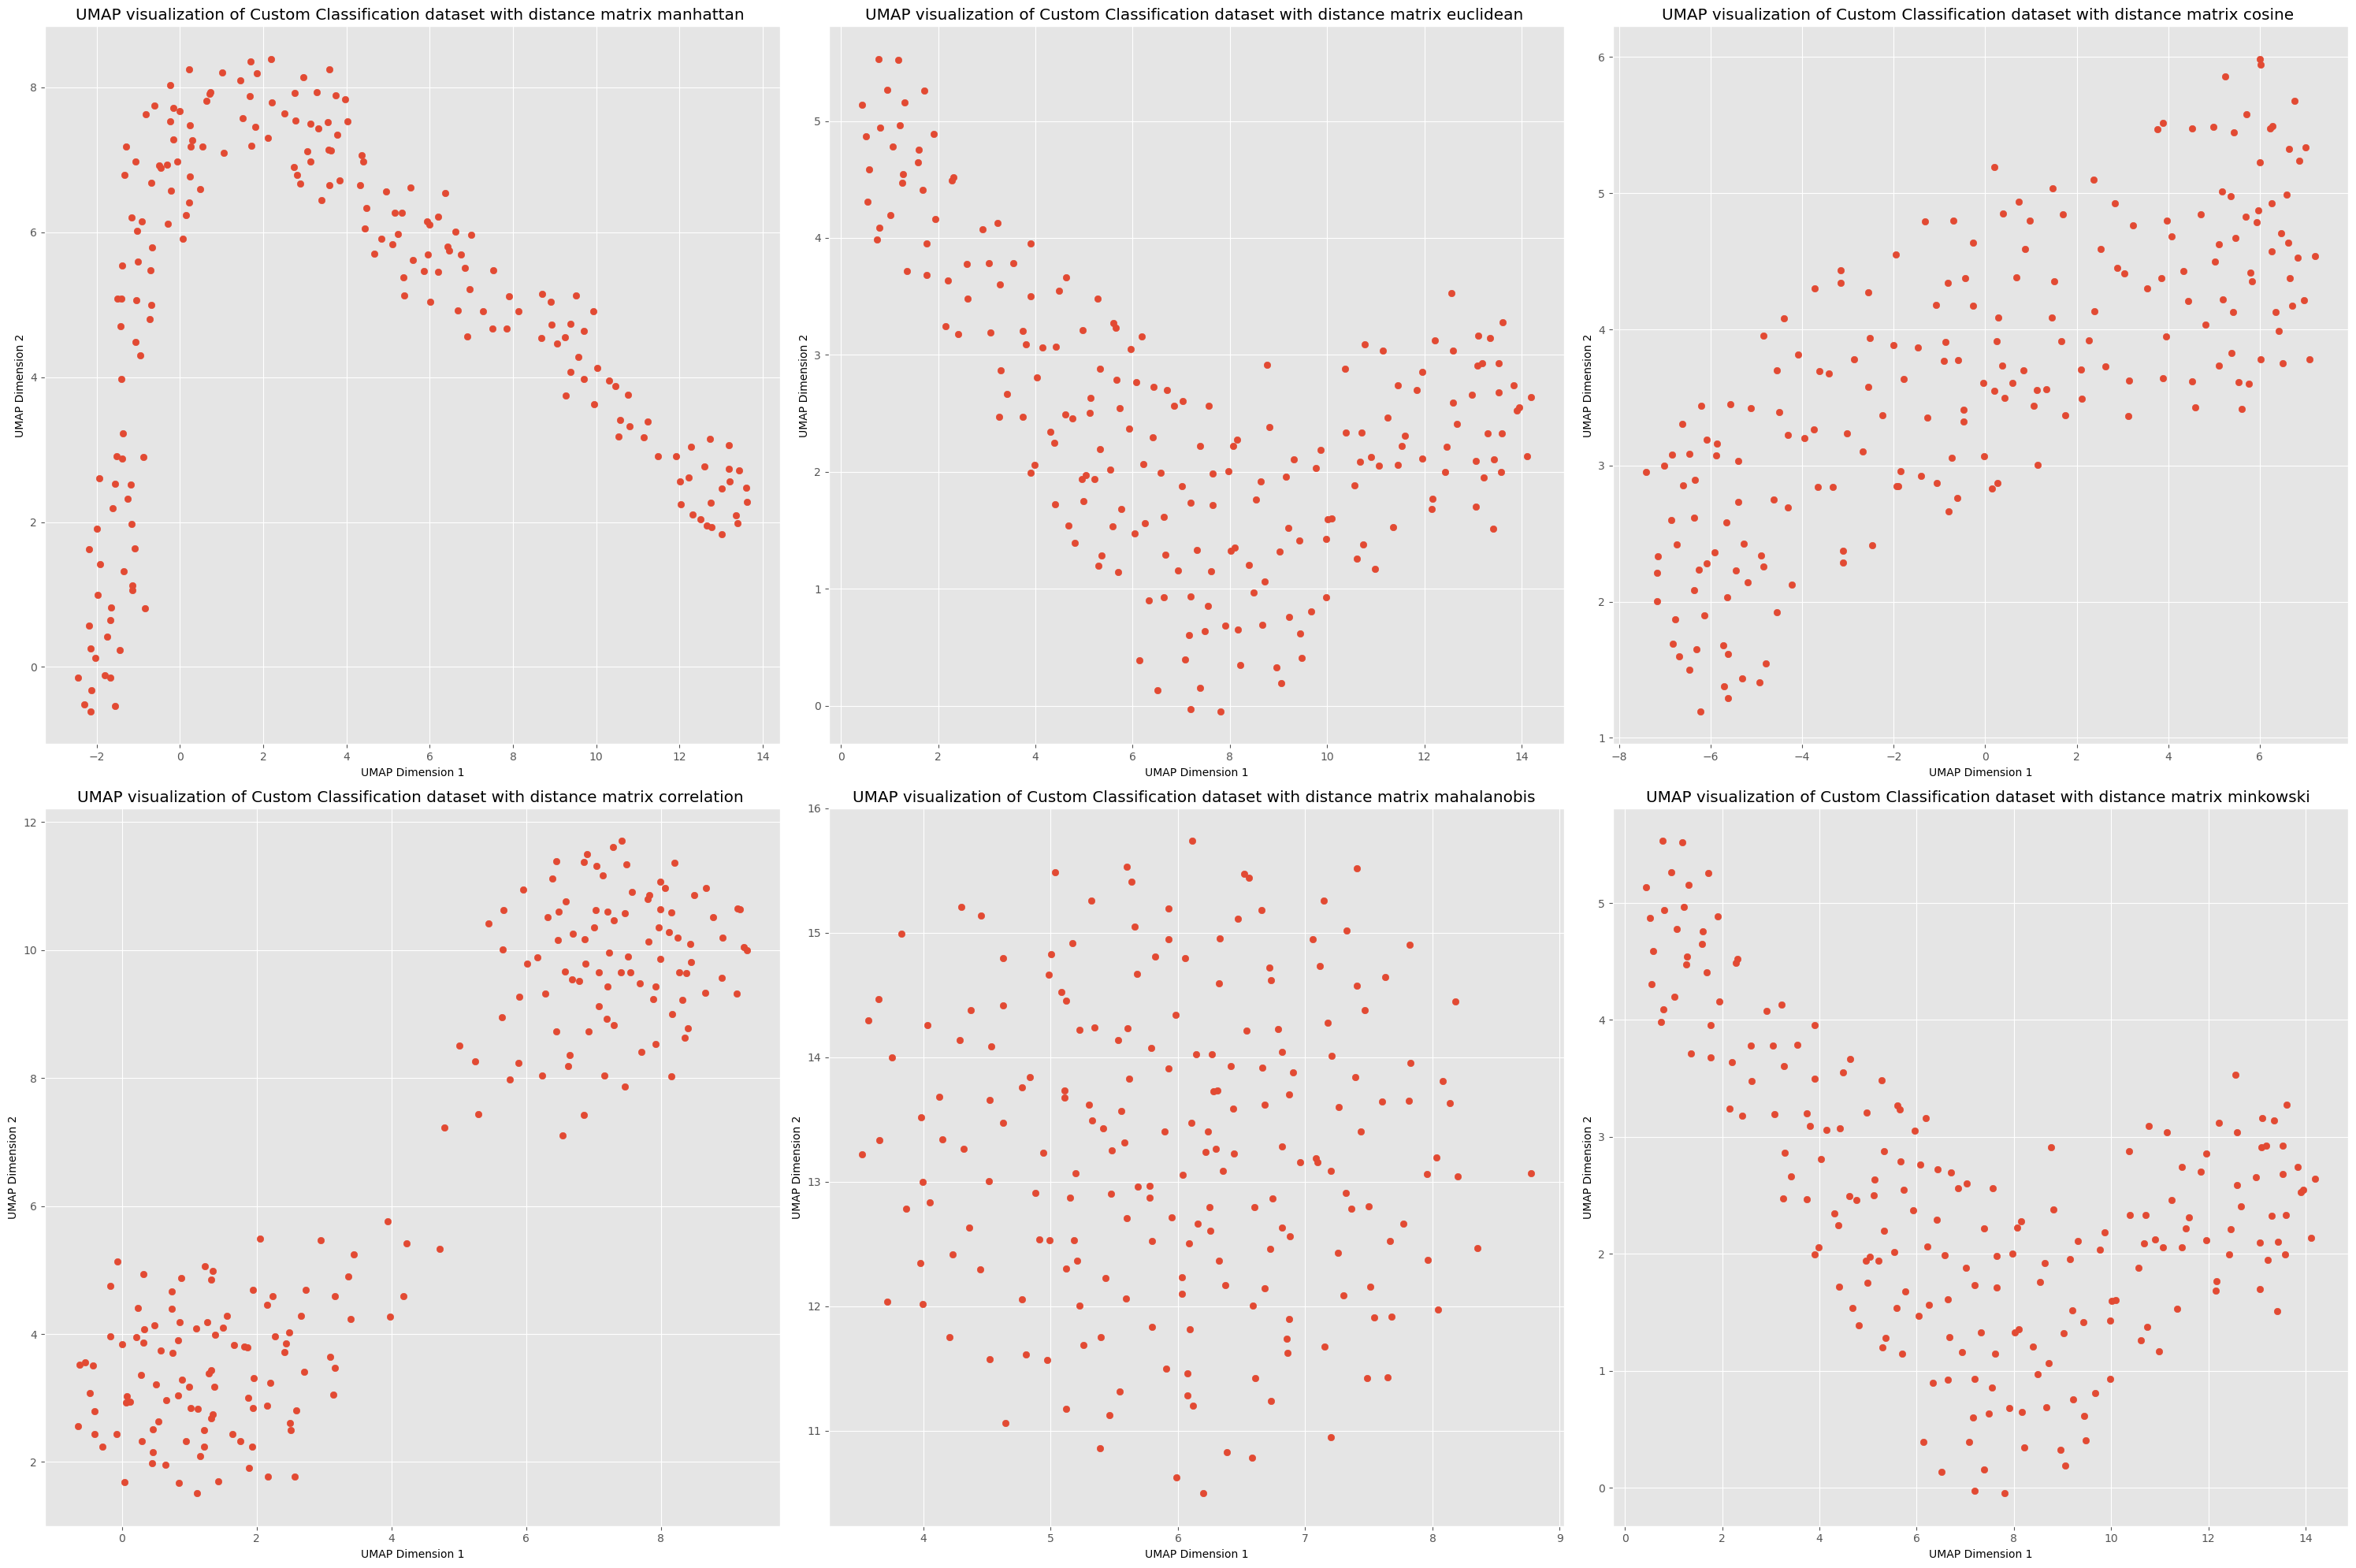

In [260]:
umap_visual_matrices(umap_results)



In [206]:
import umap
def dim_red_UMAP_(centered_dataset,n_neighbors,min_dist,metric,n_components):
            
            umap_obj = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=42)
            umap_red = umap_obj.fit_transform(centered_dataset)
            
            return  umap_red

In [121]:
def applying_tnse_(centered_dataset,n_components,perplexity,metric):
           
            tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=42, verbose=2 , metric=metric)
            X_tsne = tsne.fit_transform(centered_dataset)
            
            return X_tsne
           

In [261]:
#['manhattan', 'euclidean','cosine','correlation','mahalanobis','minkowski']:
umap=dim_red_UMAP_(centered_dataset,2,0.2,'mahalanobis',42)

In [262]:
X=umap
warnings.filterwarnings("ignore")

def objective(trial):
    
    
    # Define the GMM parameters to be tuned
    n_components = trial.suggest_int('n_components', 2, 10)
    covariance_type = trial.suggest_categorical('covariance_type', ['full', 'tied', 'diag', 'spherical'])
    init_params = trial.suggest_categorical('init_params', ['random', 'kmeans'])

    # Create and fit the GMM model
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, init_params=init_params, random_state=0)
    gmm.fit(X)

    # Calculate the BIC score as the objective to minimize
    bic_score = gmm.bic(X)
    return bic_score


warnings.filterwarnings("default")

In [263]:
warnings.filterwarnings("ignore")
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_bic_score = study.best_value

print('Best Parameters:', best_params)
print('Best BIC Score:', best_bic_score)
warnings.filterwarnings("default")

[I 2023-06-02 23:16:20,352] A new study created in memory with name: no-name-ba879b44-67ff-4d13-afc4-3997d101ac86
[I 2023-06-02 23:16:20,352] Trial 0 finished with value: -9168.308051904556 and parameters: {'n_components': 4, 'covariance_type': 'spherical', 'init_params': 'random'}. Best is trial 0 with value: -9168.308051904556.
[I 2023-06-02 23:16:20,465] Trial 1 finished with value: -8431.658508099872 and parameters: {'n_components': 3, 'covariance_type': 'diag', 'init_params': 'kmeans'}. Best is trial 0 with value: -9168.308051904556.
[I 2023-06-02 23:16:20,478] Trial 2 finished with value: -9481.223609238972 and parameters: {'n_components': 6, 'covariance_type': 'diag', 'init_params': 'random'}. Best is trial 2 with value: -9481.223609238972.
[I 2023-06-02 23:16:20,614] Trial 3 finished with value: -14862.7310309776 and parameters: {'n_components': 10, 'covariance_type': 'tied', 'init_params': 'kmeans'}. Best is trial 3 with value: -14862.7310309776.
[I 2023-06-02 23:16:20,623] Tr

Best Parameters: {'n_components': 2, 'covariance_type': 'tied', 'init_params': 'kmeans'}
Best BIC Score: -15469.913381670693


In [264]:
from sklearn import  mixture
def Bic (range_of_clusters,data, covariance_type,init_params):
        ks = np.arange(1,range_of_clusters)
        bics = []
        for k in ks:
            gmm = mixture.GaussianMixture(n_components=k, # this is the number of clusters
                                 covariance_type=covariance_type, # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                                 max_iter=100, # the number of EM iterations to perform. default=100
                                 n_init=2, # the number of initializations to perform. default = 1
                                 init_params=init_params, # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                                 verbose=0, # default 0, {0,1,2}
                                 random_state=0 # for reproducibility
                                )
            gmm.fit(data)
            bics.append(gmm.bic(data))

        # Plot the data    
        fig, ax = plt.subplots()
        ax.plot(ks, bics)
        ax.set_xlabel(r'Number of clusters, $k$')
        ax.set_ylabel('BIC')
        ax.set_xticks(ks);

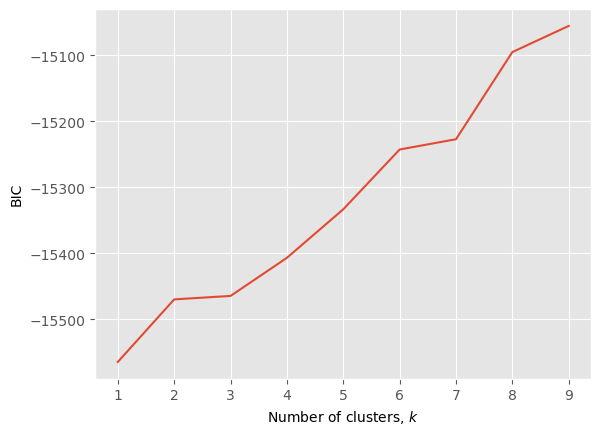

In [265]:
warnings.filterwarnings("ignore")
Bic (10,umap, best_params['covariance_type'],best_params['init_params'])
warnings.filterwarnings("default")

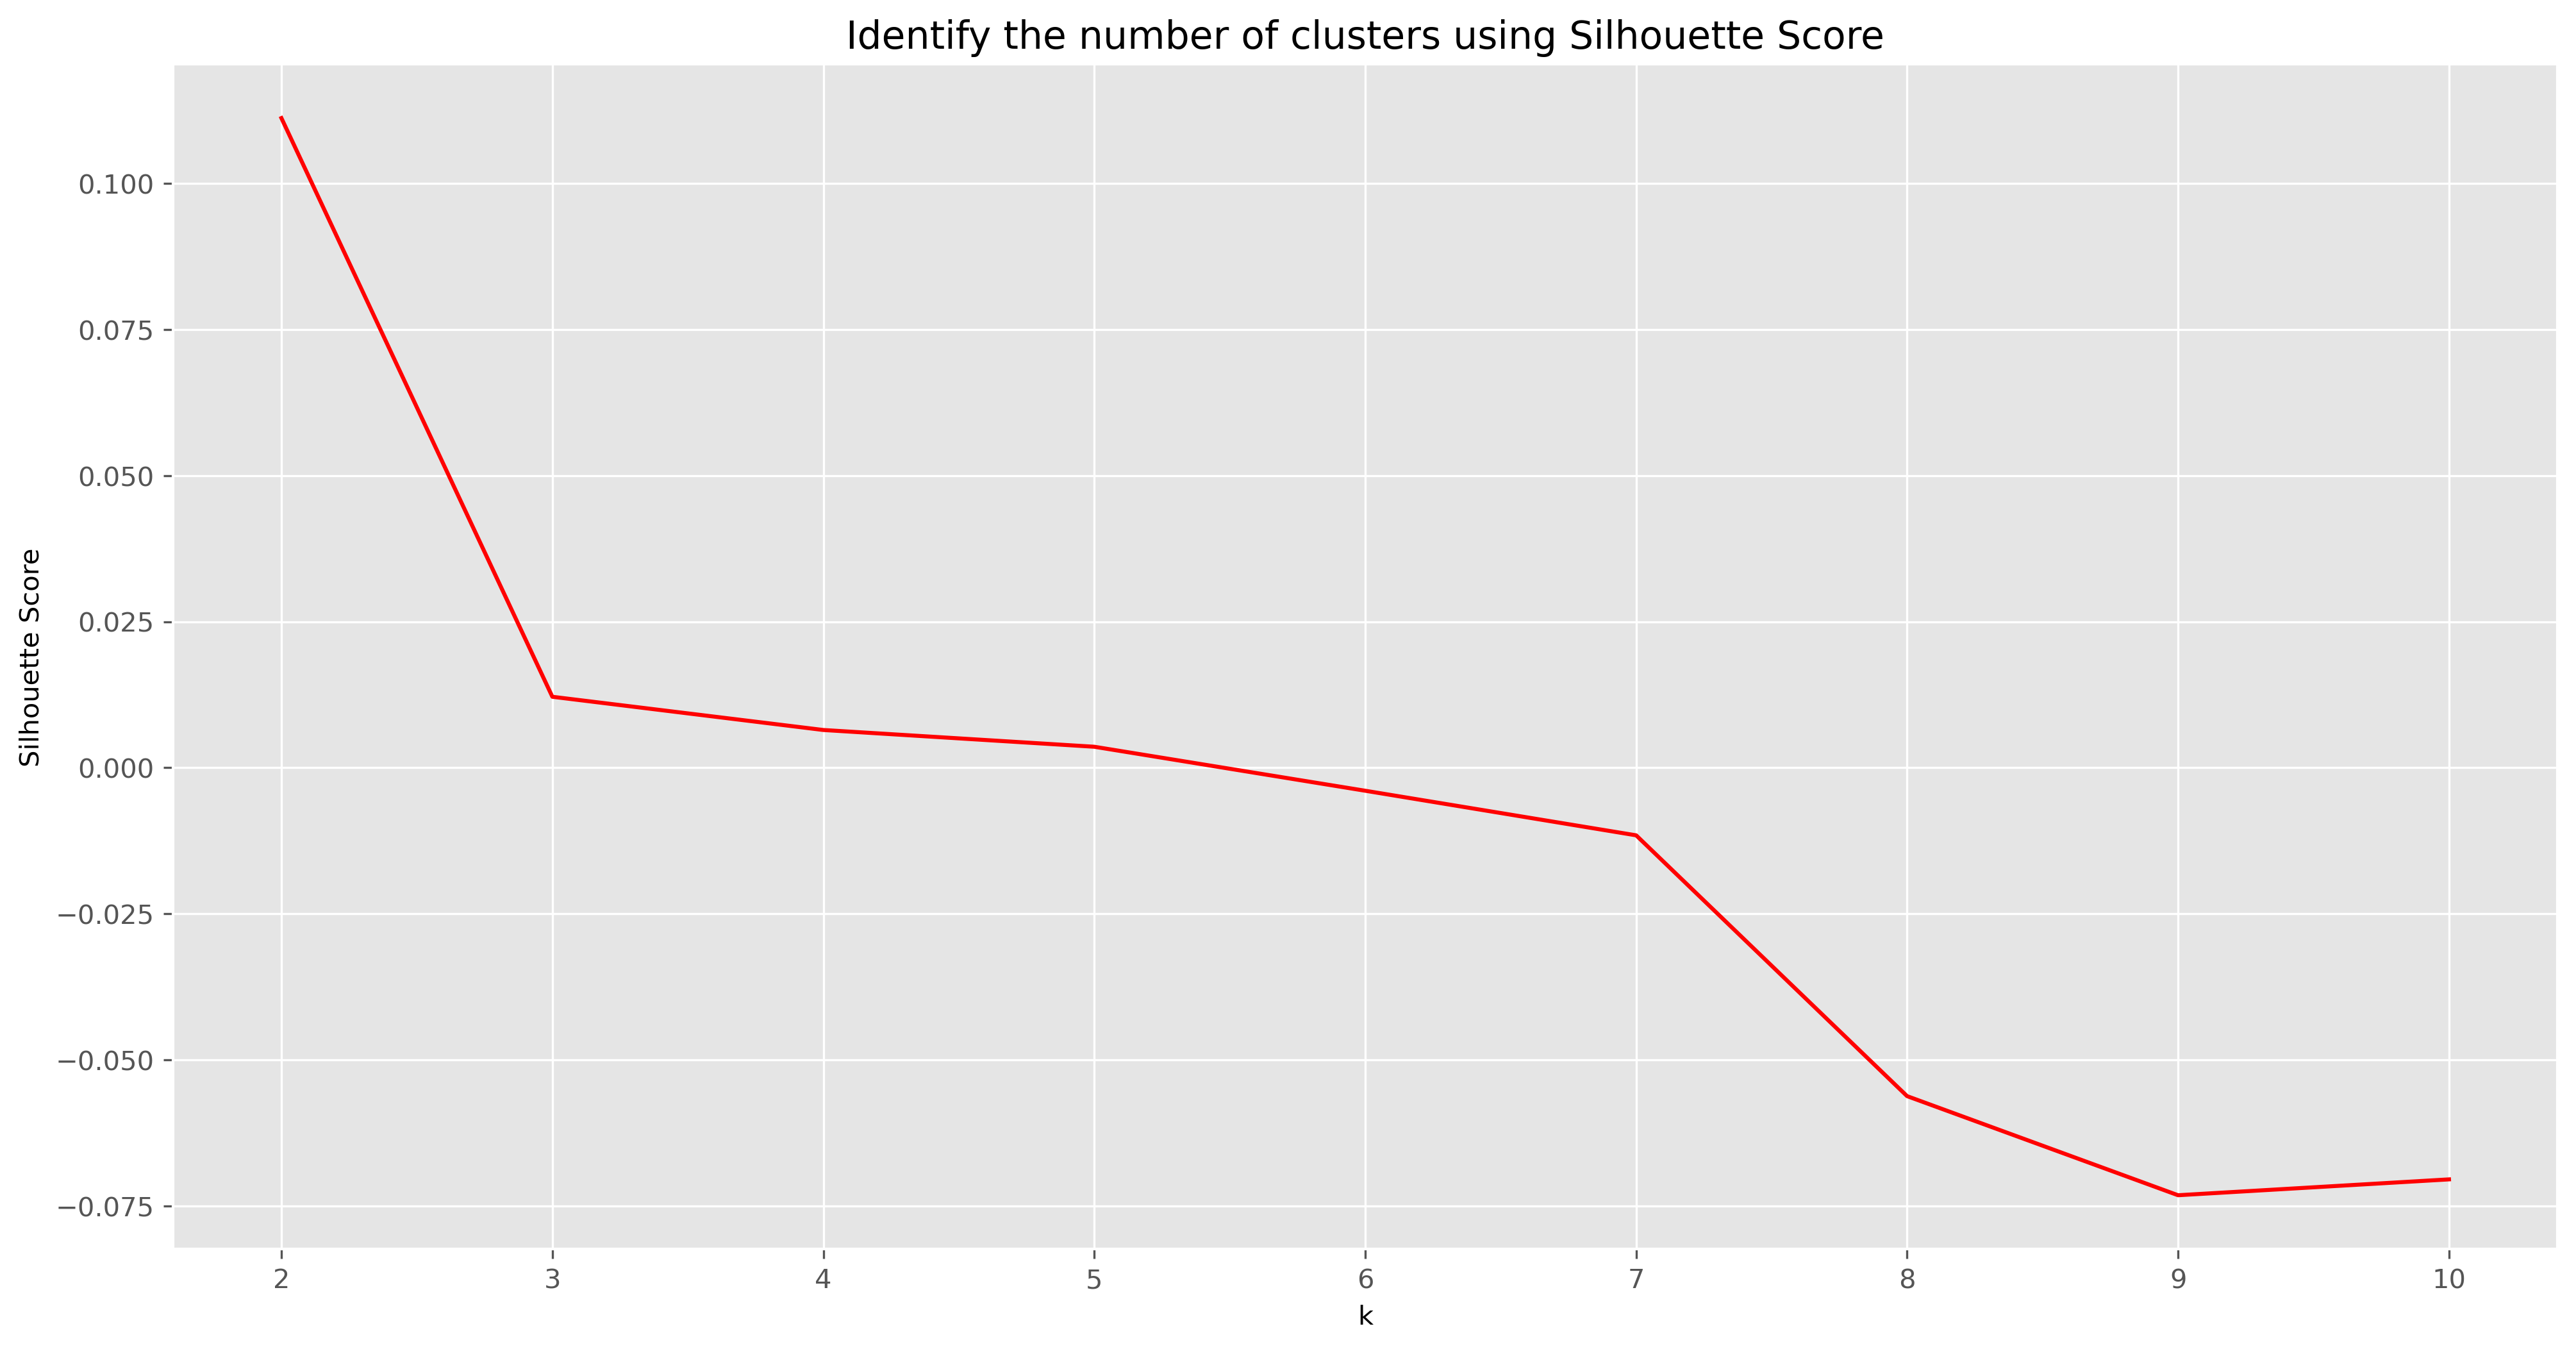

In [266]:
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X =umap

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='random')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, color='red')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [268]:

def GMM_(X,n_components,init_params,n_init,max_iter,covariance_type):
        # Set the model and its parameters - 4 clusters
        model = GaussianMixture(n_components=n_components, # this is the number of clusters
                                 covariance_type=covariance_type, # {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
                                 max_iter=max_iter, # the number of EM iterations to perform. default=100
                                 n_init=n_init, # the number of initializations to perform. default = 1
                                 init_params=init_params, # the method used to initialize the weights, the means and the precisions. {'random' or default='k-means'}
                                 verbose=0, # default 0, {0,1,2}
                                 random_state=42# for reproducibility
                                )

        # Fit the model and predict labels
        clust = model.fit(X)
        labels = model.predict(X)
        # Print model summary
        print('***************  Cluster Model ***************')
        
        print('Means: ', clust.means_)
     
        print('Converged: ', clust.converged_)
        print(' No. of Iterations: ', clust.n_iter_)
        #print('Lower Bound: ', clust4.lower_bound_)
        return model, clust ,labels 

In [272]:
model, clust ,labels=GMM_(umap,3,best_params['init_params'],1,100,best_params['covariance_type'])

***************  Cluster Model ***************
Means:  [[4.79429541 3.65805474 4.49638998 4.1142954  4.80151739 3.28470594
  4.56388505 4.43238253 5.2409888  4.84320988 6.76239906 6.04375894
  5.32475186 5.95989523 5.70964459 5.4636459  3.97461198 4.98526694
  4.88985937 5.99967461 5.31142899 5.89084886 5.82846838 4.12812812
  5.61921705 1.88634439 5.53391885 4.55422388 6.19319929 5.70106183
  6.10815241 4.03716193 5.25039604 5.70732602 4.58963455 6.16583589
  6.41896944 5.17889448 5.37609036 6.88229528 6.37594523 4.9617717 ]
 [4.79966872 3.35102841 4.42353174 4.37441558 4.67061042 3.36081654
  4.68403165 4.33428131 5.39778291 4.9795643  6.65615007 6.0093792
  5.43700789 6.00937998 5.67133187 5.31675125 4.12386453 4.97408971
  5.01622127 5.80396685 5.41626584 5.92157933 5.63755117 4.40857026
  5.1907215  1.83887577 5.53855145 4.88609298 5.70006568 5.65096781
  6.21763065 4.02620901 5.15804784 5.49512608 4.31529431 6.19222939
  6.159355   5.26159011 5.47884831 6.63219082 6.00792946 5.16

C:\Users\batou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [273]:

def visual_GMM_clusters(labels):
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.title('Gaussian Mixture Models (GMM) Clustering')
        plt.show()

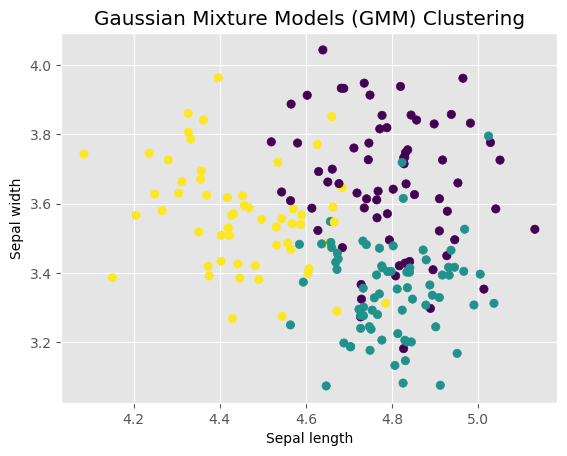

In [274]:
visual_GMM_clusters(labels)

In [275]:
# Compute posterior probabilities
def posterior_(model):
       
        posterior_probs = model.predict_proba(X)
        sns.heatmap(posterior_probs, cmap='Blues')
        plt.xlabel('Cluster')
        plt.ylabel('Cell')
        plt.title('Posterior Probabilities')
        plt.show()
        return posterior_probs
    
def plot_scatters(data, gmm, title='', method='Dim', name=''):
    plt.style.use("ggplot")
    responsibilities = gmm.predict_proba(data)
    if responsibilities.shape[1] < 3:
        responsibilities = np.c_[responsibilities, np.ones(responsibilities.shape[0])]
    elif responsibilities.shape[1] > 3:
        responsibilities = responsibilities[:, 2]
    plt.scatter(data[:, 0], data[:, 1], marker='o', c=responsibilities, cmap='Spectral')
    plt.xlabel(f'{method} 1')
    plt.ylabel(f'{method} 2')
    plt.title(title)
    plt.savefig(f'{title}_{name}.png')
    plt.show()

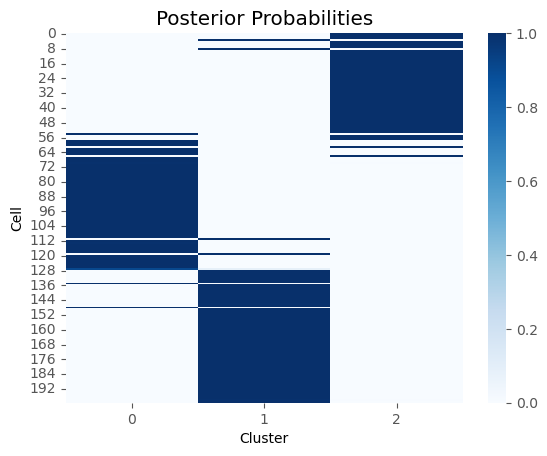

In [276]:
posterior_umap_probs=posterior_(model)

In [277]:

def plot_posterior_pdf(data, gmm, title='', name=''):
    plt.style.use("ggplot")
    logprob = gmm.score_samples(data)
    pdf = np.exp(logprob)
    plt.plot([i for i in range(data.shape[0])], pdf, '-k', c='blue')
    plt.xlabel('Cell index')
    plt.ylabel('Joint Probability')
    plt.title(title)
    plt.savefig(f'{title}_{name}.png')
    plt.show()







In [278]:
cluster1_joint_posterior = np.prod(posterior_umap_probs[labels == 0], axis=0)
cluster2_joint_posterior = np.prod(posterior_umap_probs[labels == 1], axis=0)
cluster3_joint_posterior = np.prod(posterior_umap_probs[labels == 2], axis=0)
#cluster4_joint_posterior = np.prod(posterior_pca_probs[cluster_umap_labels == 3], axis=0)


cell_joint_distributions=[cluster1_joint_posterior,cluster2_joint_posterior,cluster3_joint_posterior]

cell_joint_distributions

[array([0.89022482, 0.        , 0.        ]),
 array([0.       , 0.9871114, 0.       ]),
 array([0.        , 0.        , 0.99917578])]

C:\Users\batou\AppData\Local\Temp\ipykernel_15556\1131831326.py:52: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.



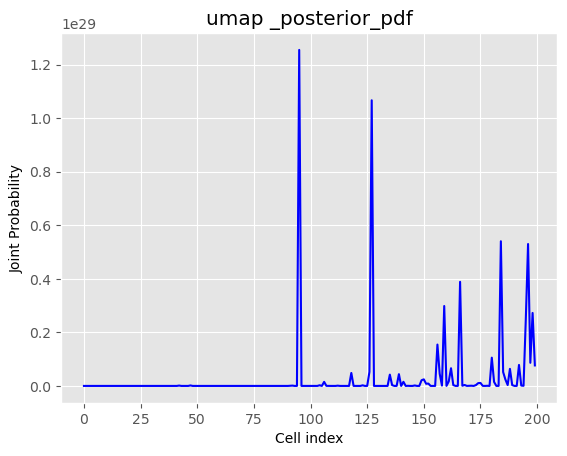

In [279]:
plot_posterior_pdf(umap,model, title='umap _posterior_pdf', name='umap')

In [ ]:
# Create a DataFrame with gene expression and cluster assignments
gene_expression_cluster = pd.concat([pd.Series(df.index, name='Cell'), pd.Series(labels, name='Cluster'), pd.DataFrame(expressions.T, columns=genes)], axis=1)

# Plot the gene expression boxplot by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=gene_expression_cluster, x='Cluster', y='G1', showfliers=False)
plt.xlabel('Cluster')
plt.ylabel('G1')
plt.title('Gene Expression Boxplot by Cluster')
plt.xticks(rotation=90)
plt.show()

In [233]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

def autoencoder_(data):
        # Define the dimensions of your input data
        input_dim = data.shape[1]  # Number of features

        # Define the architecture of the autoencoder
        encoding_dim = 2  # Dimensionality of the encoded representation
        input_layer = Input(shape=(input_dim,))
        encoded = Dense(encoding_dim, activation='relu')(input_layer)
        decoded = Dense(input_dim, activation='sigmoid')(encoded)

        # Create the autoencoder model
        autoencoder = Model(inputs=input_layer, outputs=decoded)

        autoencoder.compile(optimizer='adam', loss='mse')  # Use mean squared error loss
        autoencoder.fit(data, data, epochs=10, batch_size=32)

        encoder = Model(inputs=input_layer, outputs=encoded)
        encoded_data = encoder.predict(data)  # 'data' is your input data matrix
        return encoded_data



In [231]:
# New Pipeline with Density-Based Clustering (DBSCAN)
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
# Density-Based Clustering
def dbscan_(encoded_data):
        dbscan = DBSCAN(eps=1, min_samples=2)
        labels_dbscan = dbscan.fit_predict(encoded_data )

        # Visualization of DBSCAN
        plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=labels_dbscan, cmap='viridis')
        plt.title('Clustering Results - DBSCAN')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

In [234]:
def newpipeline(name):
    df=importdata(name)
    data=preprocessing(df)
    visualizedata(centered_dataset, df)
    encoded_data=autoencoder_(data)
    dbscan_(encoded_data)
    
    

C:\Users\batou\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



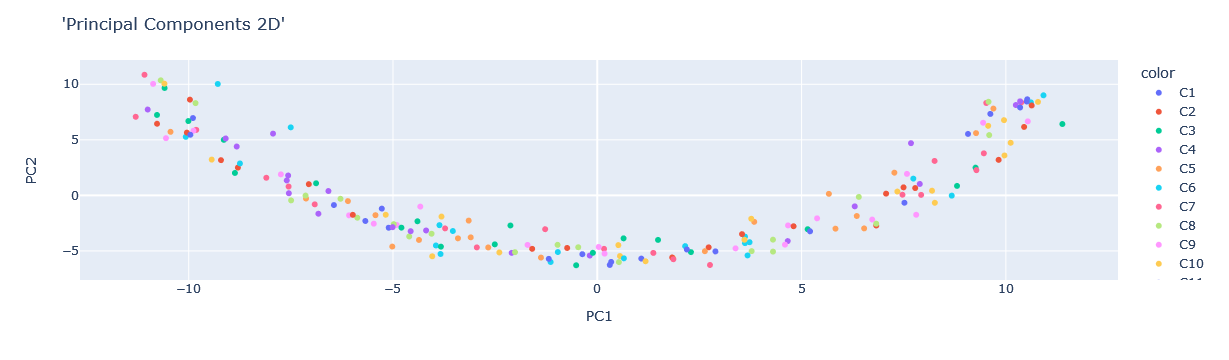

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 1.2500
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 1.2470
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 1.2435
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 1.2391
Epoch 5/10
7/7 [==============================] - 0s 777us/step - loss: 1.2327
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.2243
Epoch 7/10
7/7 [==============================] - 0s 528us/step - loss: 1.2136
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 1.1990
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 1.1832
Epoch 10/10
7/7 [==============================] - 0s 2ms/step


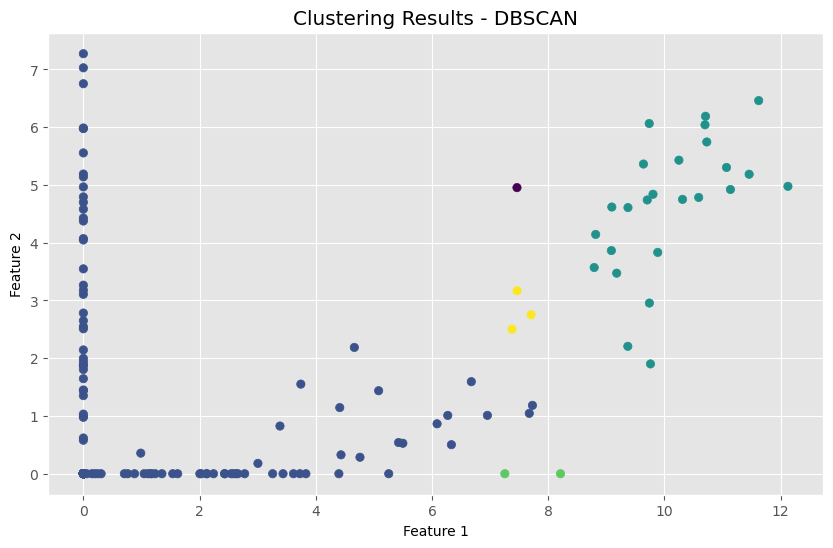

In [280]:
newpipeline("dataset1.csv")